Student Name: Chelliah Kanthanathan
Student ID: 18263003

In [170]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import model_selection
from sklearn.utils import shuffle
import random
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from numpy import percentile

# Task 1 - Load the data set

In [74]:
df = pd.read_csv('./bank_et2.csv')

# Print the first five rows
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [75]:
# Print the last five rows
df.tail(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [256]:
df.describe()

,Unnamed: 0,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous,age_normaldistributed,balance_normaldistributed,agevsbalance_ratio,duration_normaldistributed,pdays_normaldistributed,ratio_bal_ln_normaldistributed,ratio_ln_inc_normaldistributed
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1205.000000,1332.000000
mean,999.500000,41.748500,1433.391500,0.241951,0.485030,13.851500,292.020500,1.909500,168.123000,2.561500,3.688174,6.272762,1.708137,5.411072,-inf,-0.640859,-0.277547
std,577.494589,12.686241,3121.677588,0.821604,1.075543,9.712189,221.557295,1.378862,131.463334,3.400735,0.292571,1.537031,0.426841,0.774774,NaN,1.068882,1.039940
min,0.000000,18.000000,1.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,0.000000,0.000000,2.890372,0.000000,0.000000,1.945910,-inf,-6.428579,-6.986021
25%,499.750000,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000,3.465736,5.305780,1.437281,4.983607,4.327422,-1.147775,-0.706818
50%,999.500000,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000,3.637586,6.311733,1.724672,5.463832,5.204007,-0.396361,-0.026866
75%,1499.250000,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000,3.912023,7.405192,1.983620,5.937536,5.525453,0.110319,0.442892
max,1999.000000,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000,4.532599,11.304720,2.970976,7.508239,6.749931,1.085858,1.397955


# Task 1 - Fill-in the missing values in the bank dataset 

In [76]:
# check if any data is missing
df.count()

Unnamed: 0      2000
age             1988
job             1990
marital         2000
education       1896
default         2000
balance         2000
ratio_bal_ln    2000
ratio_ln_inc    2000
housing         2000
loan            2000
contact         1809
day             2000
month           2000
duration        2000
campaign        2000
pdays           2000
previous        2000
poutcome        1546
subscribed      2000
dtype: int64

### Above output concludes that 5 attributes have missing values as below,

#### job 1990 (missing 10 values)
#### age 1988 (missing 12 values)
#### education 1896 (missing 104 values)
#### contact 1809 (missing 191 values)
#### poutcome 1546 (missing 454 values)

#### The Job and age has very small number of missing values. Thus these attributes can be fileld with simple methods.  

#### Age can be filled by taking mean. Similarly the job can be filled using forward fill that fill missing value with the preceding value

In [77]:
# ensure to covert mean to int to fill the age as whole number
df['age'].fillna(int(df['age'].mean()),inplace=True)

# check if all the missing values filled
df['age'].count()

2000

In [78]:
df['job'].fillna(method='ffill',inplace=True)

# check if all the missing values filled
df['job'].count()

2000

Text(0, 0.5, 'Frequency')

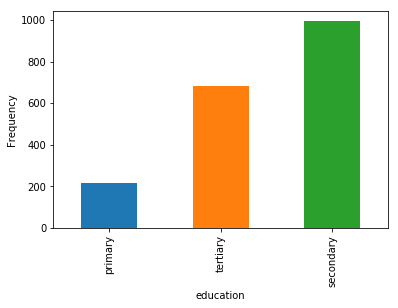

In [79]:
# check the distribution for attribute education
# Plotting bar chart for education.
frequency_table = df['education'].value_counts(ascending=True)
frequency_table.plot(kind='bar')
plt.xlabel('education')
plt.ylabel('Frequency')

In [80]:
# check if the distribution is shared equally across different categories
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [81]:
# Above chart concludes that there are only three categories, The secondary and tertiary have high frequencies. so we 
# can safely fill the missing value with the preceding values

In [82]:
df['education'].fillna(method='ffill',inplace=True)

# check if all the missing values filled
df['education'].count()

2000

In [83]:
# check the distribution for attribute education to ensure that the values equally disctrbuted between different categories
df['education'].value_counts()

secondary    1045
tertiary      725
primary       230
Name: education, dtype: int64

Text(0, 0.5, 'Frequency')

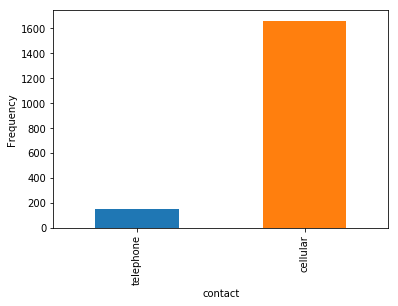

In [84]:
# check the distribution for attribute contact
# Plotting bar chart for education.
frequency_table = df['contact'].value_counts(ascending=True)
frequency_table.plot(kind='bar')
plt.xlabel('contact')
plt.ylabel('Frequency')

In [85]:
# check if the distribution is shared equally across different categories
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [86]:
# Almost 1663 samples have value 'cellular'. So safely the missing values can be filled with value 'cellular'
df['contact'].fillna('cellular',inplace=True)

# check if all the missing values filled
df['contact'].count()

2000

In [87]:
# check the distribution for attribute contact to ensure that the values equally disctrbuted between different categories
df['contact'].value_counts()

cellular     1854
telephone     146
Name: contact, dtype: int64

Text(0, 0.5, 'Frequency')

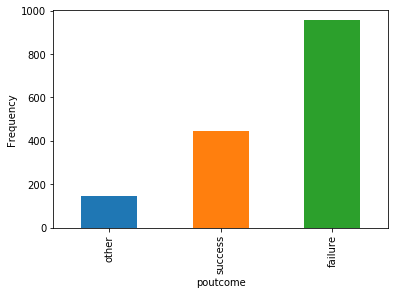

In [88]:
# check the distribution for attribute poutcome
# Plotting bar chart for education.
frequency_table = df['poutcome'].value_counts(ascending=True)
frequency_table.plot(kind='bar')
plt.xlabel('poutcome')
plt.ylabel('Frequency')

Text(0.5, 0.98, '')

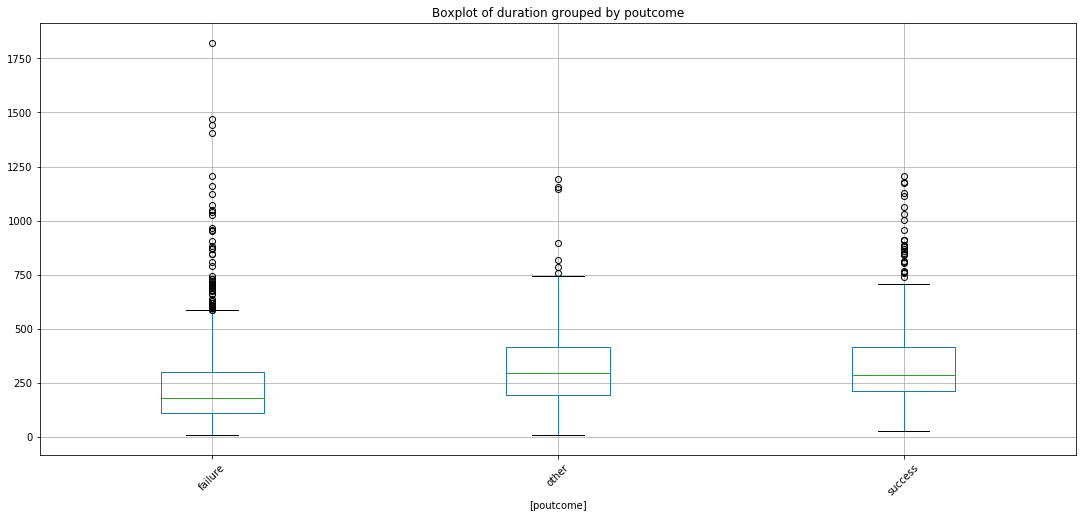

In [89]:
df.boxplot(column='duration', by=['poutcome'], rot=45, figsize=(18,8))
plt.title("Boxplot of duration grouped by poutcome")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

In [90]:
# check the distribution for attribute poutcome
df['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [91]:
# Above box plot concludes that the categories other and success have almost same median. Also from above bar chart it 
# is obvious that the categories failure and success have high frequencies.

# Key things to note down are as below,
# 1) The category "failure" falls mostly less than duration 300 except few outliers that are above 600
# 2) The duration above 750 can be abnormal so it is safer to consider this as category "other"
# 3) The rest of the missing fields that have netither duration below 300 or above 750 can be considered as category "success"

df['poutcome'].fillna(df[df['poutcome'].isnull()].apply(lambda row: 'failure' if row['duration'] < 300 else row['poutcome'],axis=1), inplace=True)

df['poutcome'].fillna(df[df['poutcome'].isnull()].apply(lambda row: 'other' if row['duration'] > 750 else row['poutcome'],axis=1), inplace=True)

df['poutcome'].fillna('success',inplace=True)

# check the distribution for attribute poutcome to ensure that the values equally disctrbuted between different categories
df['poutcome'].value_counts()

failure    1205
success     618
other       177
Name: poutcome, dtype: int64

# Task 2 - Decide on the treatment of outliers in the bank data set. 

In [92]:
# Key numerical attributes that needs to be checked for outliers are balance and age which I am using in learning
# Lets check the distribution of these numerical attributes and also check in box plot for outliers.

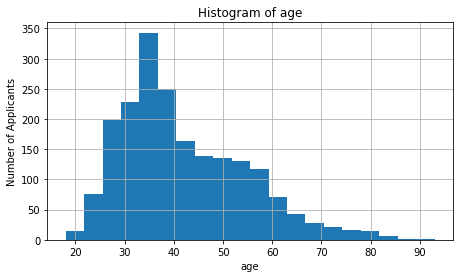

In [93]:
# Plot age
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of age")
ax1.set_xlabel('age')
ax1.set_ylabel('Number of Applicants')
df['age'].hist(bins=20)

Text(0.5, 0.98, '')

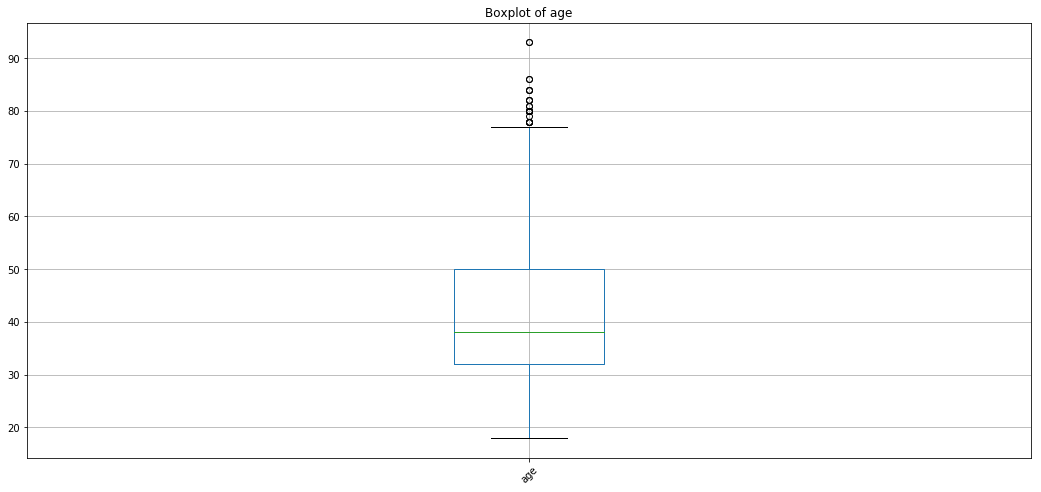

In [94]:
# plot age in box plot
df.boxplot(column='age', rot=45, figsize=(18,8))
plt.title("Boxplot of age")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

In [95]:
# above bar chart and box plot concludes that there are few outliers near the maximum range and 1 outlier above 90. These are possible values
# in the bank datasets. Hence no need to drop these samples that have outliers. Just we will use log transformation to arrive at
# normal distribution to help for learning and training data sets

In [96]:
# Use log transformation for normal distribution
df['age_normaldistributed'] = np.log(df['age'])

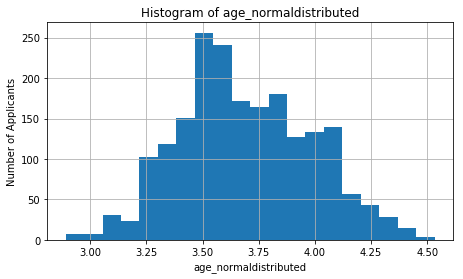

In [97]:
# Plot age that normally distributed
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of age_normaldistributed")
ax1.set_xlabel('age_normaldistributed')
ax1.set_ylabel('Number of Applicants')
df['age_normaldistributed'].hist(bins=20)

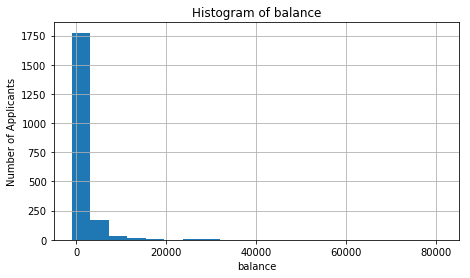

In [98]:
# Plot balance
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of Applicants')
df['balance'].hist(bins=20)

Text(0.5, 0.98, '')

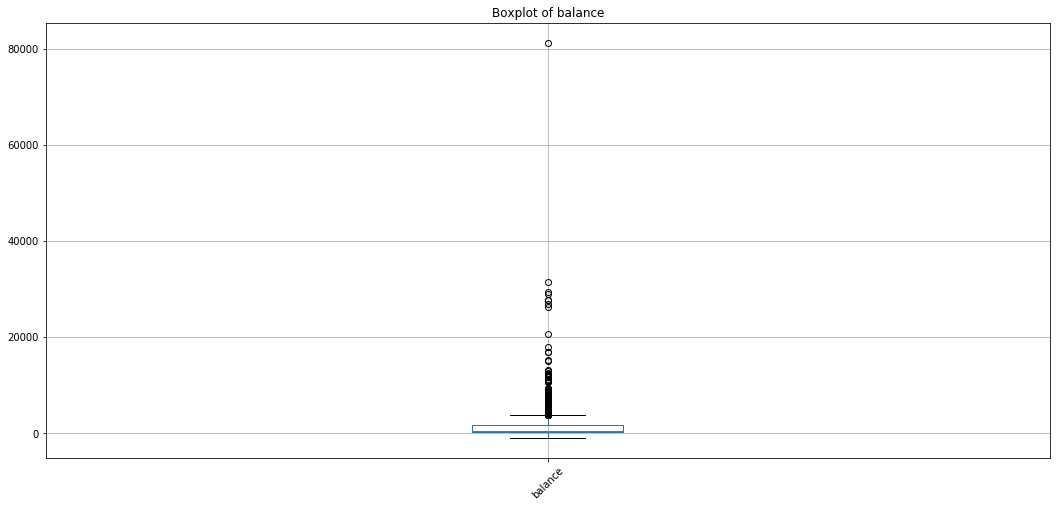

In [99]:
# plot balance in box plot
df.boxplot(column='balance', rot=45, figsize=(18,8))
plt.title("Boxplot of balance")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

In [100]:
# above bar chart and box plot concludes that there are few outliers near the maximum range and 1 outlier above 80000. These are 
# possible values in the bank datasets. But there are few outliers that are less than 0, Obviously they are account with negative 
# balance or zero balance which could be manipulated and no need to drop these samples as we will miss other vital attributes in
# these samples. So the aim is to make the negative balance and zero balance to just balance with 100 and keep all the samples

df.loc[df.balance <= 0, 'balance'] = 100

Text(0.5, 0.98, '')

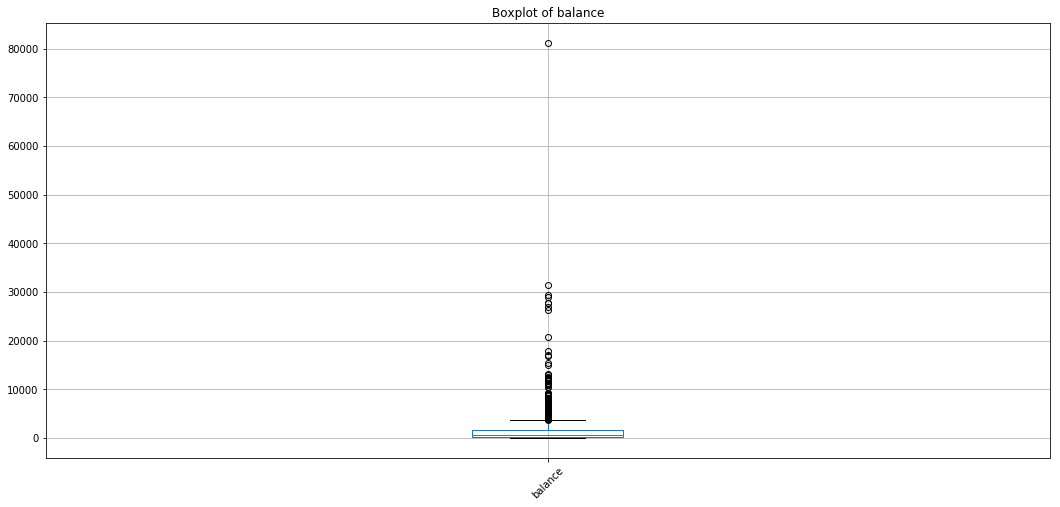

In [101]:
# plot balance in box plot to check that the minimum range (i.e. minimum whiskers) starts near 100
df.boxplot(column='balance', rot=45, figsize=(18,8))
plt.title("Boxplot of balance")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

In [102]:
# Outliers manipulated above, now use log transformation to arrive at normal distribution to help for learning and 
# training data sets

In [103]:
# Use log transformation for normal distribution
df['balance_normaldistributed'] = np.log(df['balance'])

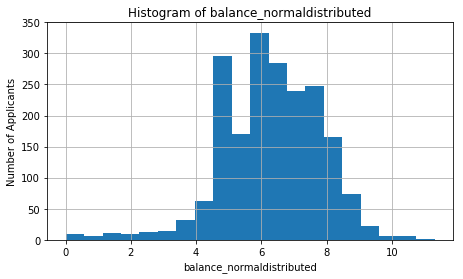

In [104]:
# Plot balance that normally distributed
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance_normaldistributed")
ax1.set_xlabel('balance_normaldistributed')
ax1.set_ylabel('Number of Applicants')
df['balance_normaldistributed'].hist(bins=20)

### Check for outliers on duration and pdays. Use one different method that is not mentioned in the lab2 example

### Use IQR method to find the outliers for duration and day

In [181]:
dur_q25, dur_q75 = percentile(df['duration'].values, 25), percentile(df['duration'].values,75)
dur_iqr = dur_q75 - dur_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (dur_q25, dur_q75, dur_iqr))

Percentiles: 25th=146.000, 75th=379.000, IQR=233.000


In [188]:
dur_cut_off = dur_iqr * 1.5
dur_lower, dur_upper = dur_q25 - dur_cut_off, dur_q75 + dur_cut_off
# identify outliers
duration_outliers = [print (x) for x in df['duration'].values if x < dur_lower or x > dur_upper]
print('Identified outliers for attriubute duration is: %d' % len(duration_outliers))

957
951
1074
786
1156
731
844
790
1823
1160
1047
1121
1026
784
1007
982
807
907
1472
758
888
882
1093
1143
1241
868
744
1064
765
880
736
1363
1226
855
1120
968
745
844
817
1148
1193
957
815
806
860
852
1005
967
897
1008
942
1360
817
874
1207
737
910
867
1720
1407
881
910
762
1205
809
1114
1178
820
775
1127
1556
977
898
1176
1032
759
738
808
1246
767
729
1440
1405
1042
808
840
908
845
799
1081
953
1334
Identified outliers for attriubute duration is: 92


In [187]:
pdays_q25, pdays_q75 = percentile(df['pdays'].values, 25), percentile(df['pdays'].values,75)
pdays_iqr = pdays_q75 - pdays_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (pdays_q25, pdays_q75, pdays_iqr))

Percentiles: 25th=75.750, 75th=251.000, IQR=175.250


In [190]:
pdays_cut_off = pdays_iqr * 1.5
pdays_lower, pdays_upper = pdays_q25 - pdays_cut_off, pdays_q75 + pdays_cut_off
# identify outliers
pdays_outliers = [print (x) for x in df['pdays'].values if x < pdays_lower or x > pdays_upper]
print('Identified outliers for attriubute duration is: %d' % len(pdays_outliers))

536
626
595
648
521
728
518
828
782
761
776
521
683
529
535
784
532
586
551
555
550
690
804
805
541
579
749
769
587
792
854
842
603
Identified outliers for attriubute duration is: 33


### The above identified outliers for attributes duration and pdays could be normal considering the data set that we have in hand. Thus not removing these outliers from the data. Just use log transformation to arrive at normal distribution to help for learning

# Task 3 - Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice

In [105]:
# Create new column agevsbalance_ratio. This ratio will ideally show the relationship between numerical attributes age and 
# balance that could add additional value in addition to age and balance to predict the existing loan in an account
df['agevsbalance_ratio'] = df['balance_normaldistributed'] / df['age_normaldistributed']

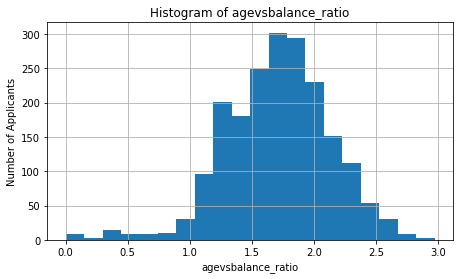

In [106]:
# Plot new column agevsbalance_ratio 
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of agevsbalance_ratio")
ax1.set_xlabel('agevsbalance_ratio')
ax1.set_ylabel('Number of Applicants')
df['agevsbalance_ratio'].hist(bins=20)

# Task 4 - Using the dataset you prepared, perform a classification on the data using scikitlearn’s logistic regression. plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded

In [306]:
#XX = df[['age_normaldistributed', 'balance_normaldistributed','agevsbalance_ratio']].values
XX = df[['age_normaldistributed', 'balance_normaldistributed']].values
print(XX.shape)
print(XX)

(2000, 2)
[[3.4657359  5.97126184]
 [3.66356165 6.53378884]
 [4.07753744 6.94215671]
 ...
 [4.39444915 7.05098945]
 [3.8286414  8.37632063]
 [3.68887945 8.76452191]]


In [307]:
yyy = df['loan'].map({'yes': 1, 'no': 0})
print(yyy)

0       0
1       1
2       1
3       1
4       0
5       0
6       1
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      1
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    1
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
Name: loan, Length: 2000, dtype: int64


In [308]:
def logistic_regression(X_train, X_test, y_train, y_test):
    
    logisticreg = LogisticRegression(solver='lbfgs')
    logisticreg.fit(X_train, y_train)
    
    # score returns accuracy. Thus subtract it from 1 to find the error
    # Find Error rate on training data set
    Ein = 1 - logisticreg.score(X_train, y_train)
    # Find Error rate on testing data set
    Eout = 1 - logisticreg.score(X_test, y_test)

    return Ein, Eout

In [309]:
list_of_e_ins = []
list_of_e_outs = []
numberof_experiment = 2000
test_size = 0.80

def ein_eout_experiment(testsize):
    XX_shuffled, yyy_shuffled = shuffle(XX, yyy, random_state=0)
    X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(XX_shuffled, yyy_shuffled, test_size=testsize,random_state=0)

    result_e_in, result_e_out = logistic_regression(X_train, X_test, y_train, y_test)
    
    print ('Ein: ', result_e_in)
    print ('Eout: ', result_e_out)
    
    list_of_e_ins.append(result_e_in)
    list_of_e_outs.append(result_e_out)

for i in range(numberof_experiment):
    ein_eout_experiment(test_size)
    
print ("\nList of Eins: ",list_of_e_ins)
print ("List of Eouts: ",list_of_e_outs)

Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000

Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999

Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000

Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000

Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000

Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000

Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000

Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000

Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000

Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000

Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000

Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000

Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000000001
Ein:  0.12749999999999995
Eout:  0.12437500000

In [320]:
error_diff = abs(np.array(list_of_e_ins)-np.array(list_of_e_outs))
prob_epsilon=[]
epsilons = np.arange(0.001,0.20,0.001)
for e in epsilons:
    prob_epsilon.append(len([1 for i in error_diff if i > e])/len(error_diff))
print ("Epsilon Probability Distribution: ", prob_epsilon)

N = 2000 #Number of training samples 80% of data set i.e. 1600 out of 2000 samples 

Epsilon Probability Distribution:  [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

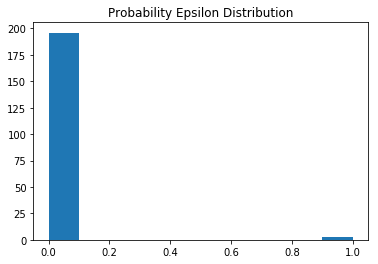

In [321]:
plt.hist(prob_epsilon)
plt.title('Probability Epsilon Distribution')
plt.show()

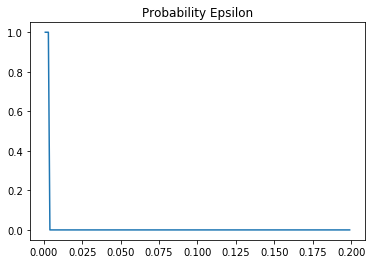

In [322]:
plt.plot(epsilons,prob_epsilon)
plt.title('Probability Epsilon')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

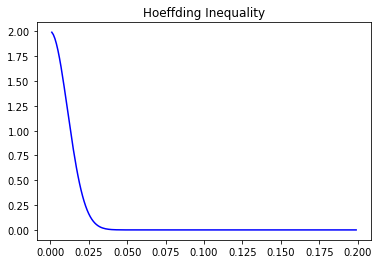

In [323]:
plt.figure()
plt.plot(epsilons, [2*math.exp(-2*N*e**2) for e in epsilons],'b')
plt.title('Hoeffding Inequality')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

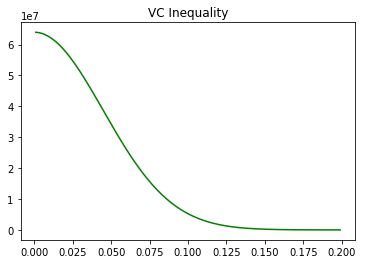

In [329]:
plt.figure()
plt.plot(epsilons, [4*((2*N)**2+1)*math.exp(-(N/8)*e**2) for e in epsilons],'g')
plt.title('VC Inequality')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

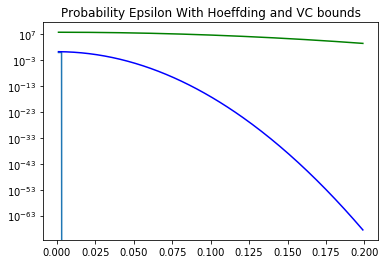

In [330]:
plt.figure()
plt.plot(epsilons,prob_epsilon)
plt.plot(epsilons, [2*math.exp(-2*e**2*N) for e in epsilons],'b')
plt.plot(epsilons, [4*((2*N)**2+1)*math.exp(-(N/8)*e**2) for e in epsilons],'g')
plt.yscale('log')
plt.title('Probability Epsilon With Hoeffding and VC bounds')
plt.show

# The Error does not exceed the Hoeffding and VC bounds

# Task 5 - Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality

In [331]:
train_size=np.linspace(.1, 1.0, 5)

In [332]:
def plot_learning_curves(estimator_model):
    plt.figure(figsize = (12,4))
    
    result_cv = ShuffleSplit(n_splits=8,test_size=0.2, random_state=0)
    
    train_sizes, train_scores, validation_scores = learning_curve(estimator_model, X = XX,
                                                                  y = yyy, train_sizes = train_size, cv = result_cv,
                                                                  scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = str(estimator_model).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()

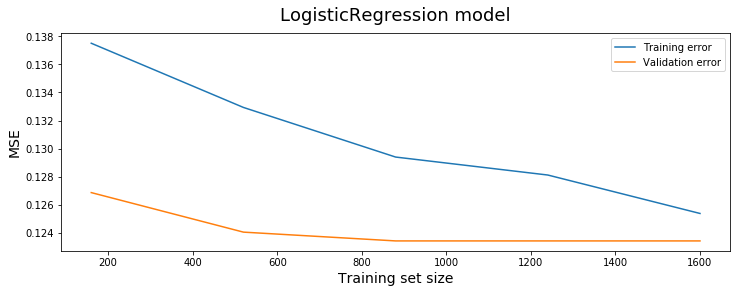

In [333]:
plot_learning_curves(LogisticRegression(solver='lbfgs'))

### The gap between the learning curves suggests a high variance and the errors does not look to converge at all for Logistic Regression. Adding more samples may help to converge.

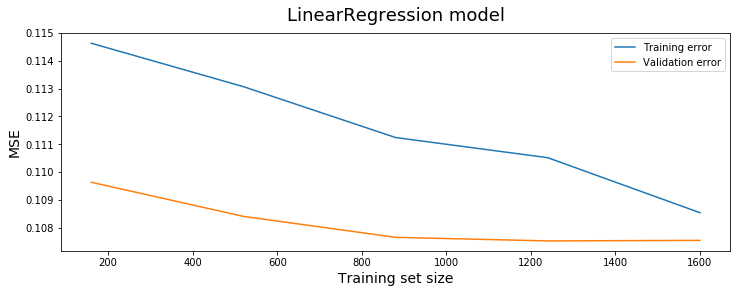

In [334]:
plot_learning_curves(LinearRegression())

### The gap between the learning curves for linear regression suggests some variance. Though the error does not converge the errors stayed closer after 1200 samples.

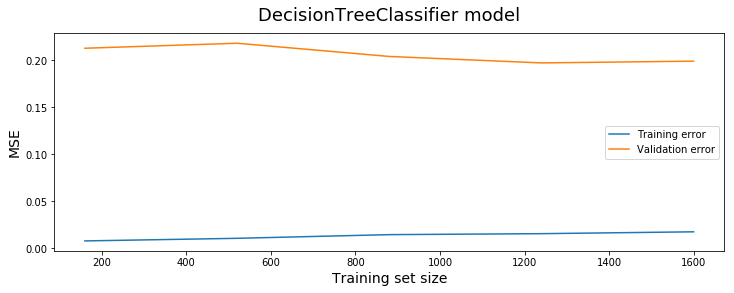

In [335]:
plot_learning_curves(DecisionTreeClassifier())

### The gap between the learning curves suggests a high variance and the errors does not look to converge at all for Decision tree as well. But it is unlikely that adding more sample will help to converge as variance are very high

# SIMPLE MODEL - In overall the above model has just two features selected so we can call this simple model with regards to VC dimension where as dvc =3 for d = 2(2D). For this model Logistic Regression and linear regression learning curves seems to get closer and may converge. I suppose adding more samples and cross validation with more number of iterations should help in getting errors curves closer with out any gap. But in general all the curves show that the model results in high variance. Perhaps the features selected for learning may not be enough and adding more features should help to classify or predict the target variable loan as Yes or No

# Try to plot learning curves for complex model. Select as much as possible features and plot learning curves.

In [336]:
# Selected 5 features to build a complex model
### Apply log transformation for duration and pdays to arrive at normal distribution to help for learning
# Use log transformation for normal distribution
df['duration_normaldistributed'] = np.log(df['duration'])

df.loc[df.pdays <= 0, 'pdays'] = 1
# Use log transformation for normal distribution
df['pdays_normaldistributed'] = np.log(df['pdays'])

XX_complex_model = df[['duration_normaldistributed','pdays_normaldistributed','age_normaldistributed', 'balance_normaldistributed','agevsbalance_ratio']].values
print(XX_complex_model.shape)
print(XX_complex_model)
XX = XX_complex_model

(2000, 5)
[[6.86380339 4.87519732 3.4657359  5.97126184 1.72294197]
 [5.45103845 4.89034913 3.66356165 6.53378884 1.78345268]
 [4.83628191 5.47646355 4.07753744 6.94215671 1.70253659]
 ...
 [5.44241771 0.         4.39444915 7.05098945 1.6045218 ]
 [5.22035583 0.         3.8286414  8.37632063 2.18780496]
 [5.33753808 0.         3.68887945 8.76452191 2.37593069]]


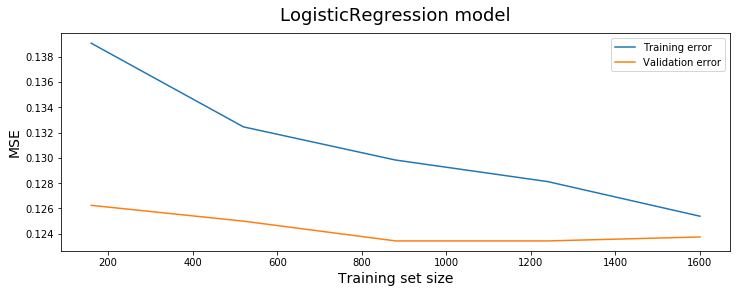

In [337]:
plot_learning_curves(LogisticRegression(solver='lbfgs'))

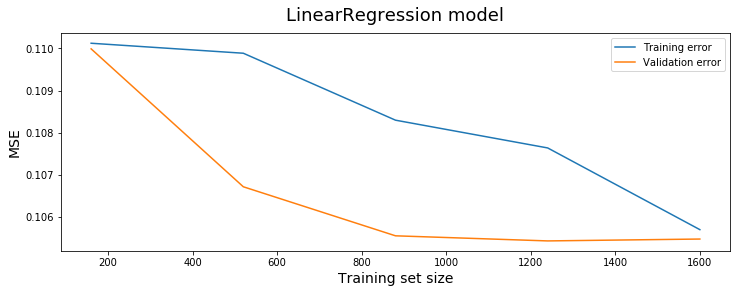

In [338]:
plot_learning_curves(LinearRegression())

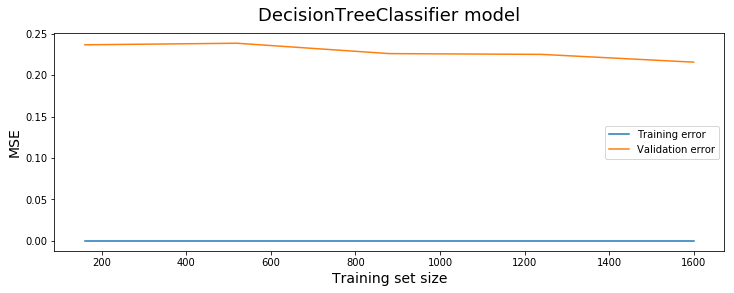

In [339]:
plot_learning_curves(DecisionTreeClassifier())

# COMPLEX MODEL - The above model has just five features selected so we can call this complex model with regards to VC dimension where as dvc =6 for d = 5(5D). For this model Logistic Regression and linear regression learning curves seems to get closer and may converge like in complex model. I suppose adding more samples and cross validation with more number of iterations should help in getting errors curves closer with out any gap. But both the simple or complex model have same output in plotting. Perhaps the features selected for learning may not be enough and adding more features will show the difference between simple and complex models